In [1]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import numpy as np
from enmspring.graphs import EigenPlotStack, EigenPlotBackboneRibose, EigenPlotHB
import matplotlib.pyplot as plt
rootfolder = '/home/yizaochen/codes/dna_rna/fluctmatch_sequence'
rtol=1e-05
atol=1e-08

### Part 1: Initialize

In [2]:
backbone_agent = EigenPlotBackboneRibose(rootfolder)
stack_agent = EigenPlotStack(rootfolder)
hb_agent = EigenPlotHB(rootfolder)

In [3]:
backbone_agent.initailize_six_systems()
stack_agent.initailize_six_systems()
hb_agent.initailize_six_systems()

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Thare are 456 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 456
There are 228 eigenvectors belonging to STRAND1.
There are 228 eigenvectors belonging to STRAND2.
Sum of two strands: 456
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/gcgc_21mer/bdna+bdna/pd_dfs exists
Thare are 456 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 456
There are 228 eigenvectors belonging to STRAND1.
There are 228 eigenvectors belonging to STRAND2.
Sum of two strands: 456
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/tgtg_21mer/bdna+bdna/pd_dfs exists
Thare are 456 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 456
There are 228 eigenvectors belonging to STRAND1.
There

### Part 2: Plotting altogether

In [4]:
hosts = ['a_tract_21mer', 'atat_21mer', 'g_tract_21mer', 'gcgc_21mer']
d_colors = {'a_tract_21mer': 'blue', 'atat_21mer': 'cyan',
            'g_tract_21mer': 'red', 'gcgc_21mer': 'magenta'}
abbr_hosts = {'a_tract_21mer': 'poly(dA:dT)', 'gcgc_21mer': 'poly(GC)',
              'g_tract_21mer': 'poly(dG:dC)', 'atat_21mer': 'poly(AT)'}
xticks = [1,100,200,300,400]

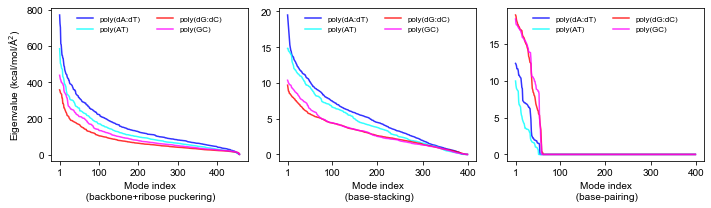

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))

ax = axes[0]
for host in hosts:
    eigenvalues = backbone_agent.d_agent[host].w
    n_eigenvalues = len(eigenvalues)
    mode_list = range(1, n_eigenvalues+1)
    ax.plot(mode_list, eigenvalues, color=d_colors[host], label=abbr_hosts[host], alpha=0.8)
ax.legend(frameon=False, ncol=2, fontsize=8, loc=9, bbox_to_anchor=(0.5, 1.0))
ax.set_ylabel('Eigenvalue (kcal/mol/Å$^2$)')
ax.set_xlabel('Mode index\n (backbone+ribose puckering)')
ax.set_xticks(xticks)

ax = axes[1]
for host in hosts:
    eigenvalues = stack_agent.d_agent[host].w
    n_eigenvalues = len(eigenvalues)
    mode_list = range(1, n_eigenvalues+1)
    ax.plot(mode_list, eigenvalues, color=d_colors[host], alpha=0.8, label=abbr_hosts[host])
ax.legend(frameon=False, ncol=2, fontsize=8, loc=9, bbox_to_anchor=(0.5, 1.0))
ax.set_xlabel('Mode index\n (base-stacking)')
ax.set_xticks(xticks)
    
ax = axes[2]
for host in hosts:
    eigenvalues = hb_agent.d_agent[host].w
    n_eigenvalues = len(eigenvalues)
    mode_list = range(1, n_eigenvalues+1)
    ax.plot(mode_list, eigenvalues, color=d_colors[host], label=abbr_hosts[host], alpha=0.8)
ax.legend(frameon=False, ncol=2, fontsize=8, loc=9, bbox_to_anchor=(0.5, 1.0))
ax.set_xticks(xticks)
ax.set_xlabel('Mode index\n (base-pairing)')

plt.tight_layout()
#plt.savefig('eigenvalue.png', dpi=300)
plt.show()

### Part 3: Plotting, Backbone, stacking split strand

In [89]:
group_host = [['a_tract_21mer', 'g_tract_21mer'],
              ['atat_21mer', 'gcgc_21mer'],
              ['ctct_21mer', 'tgtg_21mer']]
d_labels = {'a_tract_21mer': ('A-Tract: (AA)', 'A-Tract: (TT)'), 'g_tract_21mer': ('G-Tract: (GG)', 'G-Tract: (CC)'),
            'atat_21mer': ('ATAT: (AT)', 'ATAT: (AT)'), 'gcgc_21mer':  ('GCGC: (GC)', 'GCGC: (GC)'),
            'ctct_21mer':  ('CTCT: (CT)', 'CTCT: (GA)'), 'tgtg_21mer': ('TGTG: (TG)', 'TGTG: (AC)')}
xticks = [1,50,100,150,200]

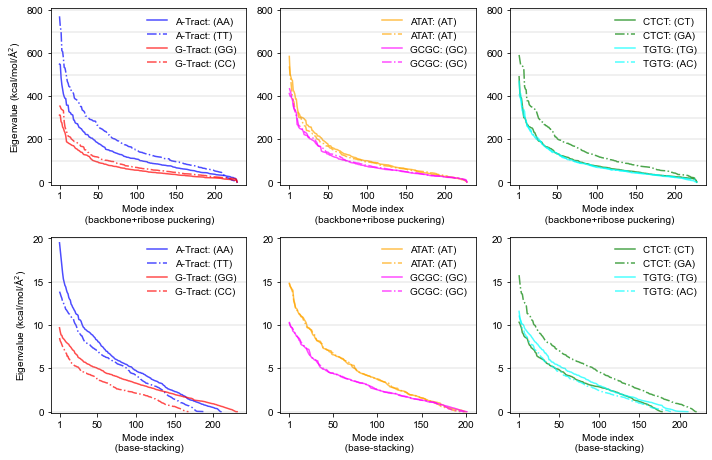

In [93]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,6.5))

agent = backbone_agent
row_id = 0
for col_id in range(3):
    ax = axes[row_id, col_id]
    for host in group_host[col_id]:
        x1, y1, x2, y2 = agent.get_lambda_array_by_host(host)
        ax.plot(x1, y1, ls='-', color=d_colors[host], alpha=0.7, label=d_labels[host][0])
        ax.plot(x2, y2, ls='-.', color=d_colors[host], alpha=0.7, label=d_labels[host][1])
    for y in range(100, 801, 100):
            ax.axhline(y, color='grey',alpha=0.15)
    ax.set_ylim(-10, 810)
    ax.set_xticks(xticks)
    ax.legend(frameon=False)
    ax.set_xlabel('Mode index\n (backbone+ribose puckering)')
    if col_id == 0:
        ax.set_ylabel('Eigenvalue (kcal/mol/Å$^2$)')

agent = stack_agent
row_id = 1
for col_id in range(3):
    ax = axes[row_id, col_id]
    for host in group_host[col_id]:
        x1, y1, x2, y2 = agent.get_lambda_array_by_host(host)
        ax.plot(x1, y1, ls='-', color=d_colors[host], alpha=0.7, label=d_labels[host][0])
        ax.plot(x2, y2, ls='-.', color=d_colors[host], alpha=0.7, label=d_labels[host][1])
    for y in [0, 5, 10, 15, 20]:
        ax.axhline(y, color='grey',alpha=0.15)
    ax.set_ylim(-0.2, 20.2)
    ax.set_xticks(xticks)
    ax.legend(frameon=False)
    ax.set_xlabel('Mode index\n (base-stacking)')
    if col_id == 0:
        ax.set_ylabel('Eigenvalue (kcal/mol/Å$^2$)')

plt.tight_layout()
#plt.savefig('eigenvalue_splitstrand.png', dpi=500)
plt.show()